**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

**Load the Dataset**

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("fish.csv")

# Display the first few rows
print(df.head(20))


   Species  Weight  Length1  Length2  Length3   Height   Width
0    Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1    Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3    Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4    Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5    Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6    Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7    Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8    Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9    Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10   Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11   Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12   Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13   Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14   Bream   600.0     29.4     32.0     37.2  14.9544 

**Data Preprocessing**

In [4]:
# Check for missing values
print(df.isnull().sum())  # No missing values expected

# Encode categorical variable (Species)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Features and target
X = df.drop(columns=['Weight'])  # Features
y = df['Weight']  # Target variable


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


**Split the Data**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train a Machine Learning Model**

In [6]:
# Use Random Forest Regressor for weight prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

**Model Evaluation**

In [7]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 44.50
R² Score: 0.97


**Visualizing Model Predictions**

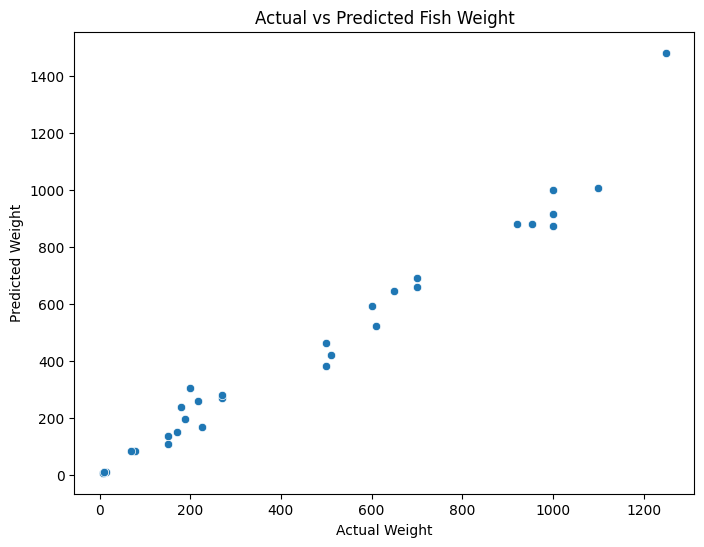

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Fish Weight")
plt.show()

In [10]:
import joblib

# Save Model & Scaler
joblib.dump(model, 'fish_weight_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']